In [11]:
# 📦 Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Estilo para los gráficos
sns.set(style="whitegrid")


In [12]:
# 📂 Carga del conjunto de datos
df = pd.read_csv('./data/abalone.csv', sep=';')

# Mostrar información básica del conjunto de datos
print('filas:', df.shape[0], 'columnas:', df.shape[1])
df.sample(5)


filas: 3676 columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
625,F,0.525,0.405,0.160,0.6580,0.2655,0.1125,0.225,12,0
1880,I,0.550,0.435,0.140,0.7995,0.2950,0.1905,0.238,10,1
2446,F,0.550,0.435,0.170,0.8840,0.2875,0.1645,0.280,14,1
346,F,0.525,0.420,0.160,0.7560,0.2745,0.1730,0.275,9,0
1187,M,0.685,0.520,0.165,1.5190,0.6990,0.3685,0.400,10,1


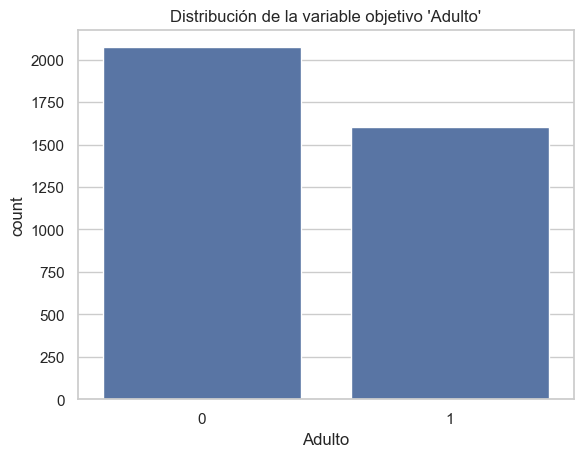

In [13]:
# 📊 Visualización de la distribución de clases
sns.countplot(data=df, x='Adulto')
plt.title("Distribución de la variable objetivo 'Adulto'")
plt.show()


In [15]:
# 🧹 Preprocesamiento de los datos
X = df.drop(columns=['Adulto', 'Sex'])  # Eliminamos la columna categórica y la de salida
y = df['Adulto']

# Mostrar balance de clases
print(y.value_counts())


Adulto
0    2073
1    1603
Name: count, dtype: int64


In [16]:
# 🔀 División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56, stratify=y)
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaño del set de entrenamiento: (2573, 8)
Tamaño del set de prueba: (1103, 8)


In [17]:
# 🔧 Estandarización de variables
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


In [18]:
# 🤖 Entrenamiento y optimización de hiperparámetros
model = KNeighborsClassifier()
folds = StratifiedKFold(n_splits=5)

grid = GridSearchCV(estimator=model,
                    param_grid={'n_neighbors': np.arange(1, 30)},
                    scoring='accuracy',
                    cv=folds)

grid.fit(X_train, y_train)

print("✅ Mejor número de vecinos:", grid.best_params_)


✅ Mejor número de vecinos: {'n_neighbors': np.int64(13)}


🔍 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       622
           1       0.84      0.90      0.87       481

    accuracy                           0.88      1103
   macro avg       0.88      0.89      0.88      1103
weighted avg       0.89      0.88      0.88      1103



C:\Users\Gabriel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


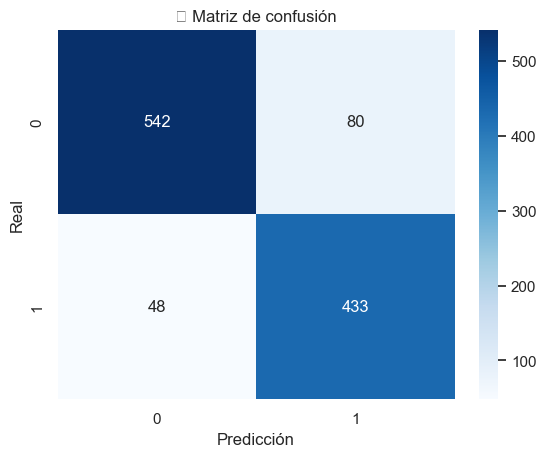

In [20]:
# 📈 Evaluación del modelo
y_pred = grid.predict(X_test)

print("🔍 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("🔍 Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
